In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from _data import *

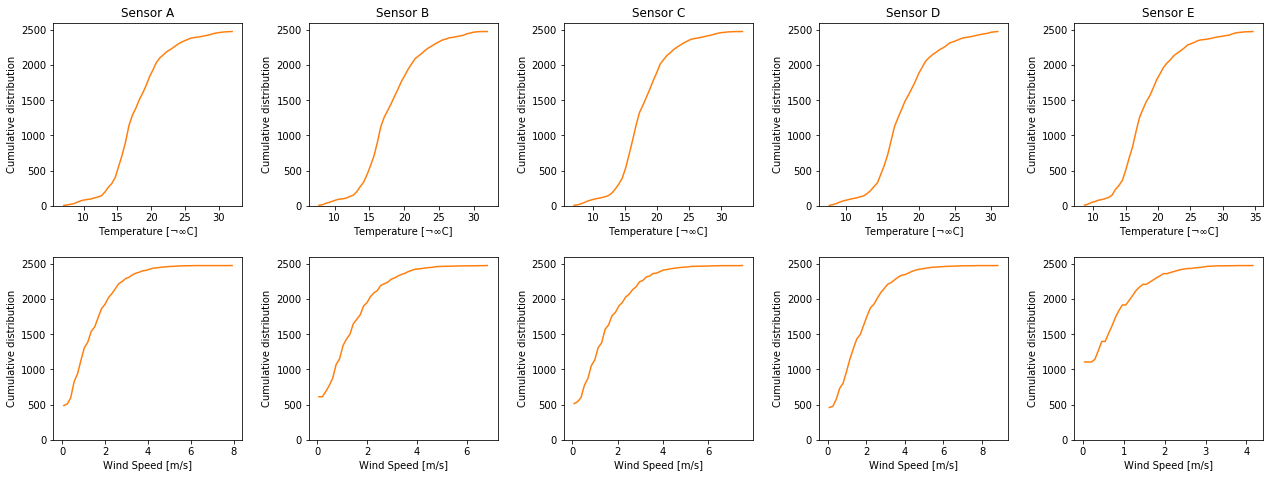

In [2]:
variables = ['Temperature', 'Wind Speed']
fig = plt.figure(figsize=(18,7))
bins = 50

for i, variable in enumerate(variables):
    for j, (sensor_name, sensor) in enumerate(data.items()):
        ax = plt.subplot2grid((len(variables),len(data)), (i,j))

        values = sensor[variable]['values']
        
        a = ax.hist(values, bins=bins, cumulative=True, alpha=0.0)
        ax.plot(a[1][1:]-(a[1][1:]-a[1][:-1])/2, a[0])
        ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
        ax.set_ylabel('Cumulative distribution')
        
        if i == 0:
            ax.set_title(sensor_name)
    
plt.tight_layout(pad=2.0)
plt.show()

In [3]:
variables = ['Temperature', 'Wind Speed']

confidence = lambda a: stats.t.interval(0.95, len(a)-1, 
                                        loc=np.mean(a), 
                                        scale=stats.sem(a))
arr = []
for i, variable in enumerate(variables):
  arr.append([])
  for sensor_name, sensor in data.items():
    values = sensor[variable]['values']
    arr[i].append('%.2f - %.2f' % confidence(values))

df = pd.DataFrame(arr, columns=data.keys(), index=variables)
df
    

,Sensor A,Sensor B,Sensor C,Sensor D,Sensor E
Temperature,17.81 - 18.13,17.90 - 18.23,17.75 - 18.07,17.84 - 18.15,18.18 - 18.53
Wind Speed,1.25 - 1.33,1.20 - 1.29,1.32 - 1.42,1.53 - 1.63,0.57 - 0.62


In [4]:
variables = ['Temperature', 'Wind Speed']
sensor_pairs = [('Sensor E', 'Sensor D'),
                ('Sensor D', 'Sensor C'),
                ('Sensor C', 'Sensor B'),
                ('Sensor B', 'Sensor A')]

arr = []
for i, variable in enumerate(variables):
  arr.append([])
  for pair in sensor_pairs:
    _data = (data[sensor][variable]['values'] for sensor in pair)
    arr[i].append('t=%.3f p=%.3f' % stats.ttest_ind(*_data))

short_names = [', '.join((a[-1:], b[-1:])) for a,b in sensor_pairs]
df = pd.DataFrame(arr, columns=short_names, index=variables)
df 

,"E, D","D, C","C, B","B, A"
Temperature,t=3.000 p=0.003,t=0.729 p=0.466,t=-1.324 p=0.185,t=0.841 p=0.400
Wind Speed,t=-32.673 p=0.000,t=5.871 p=0.000,t=3.893 p=0.000,t=-1.501 p=0.134
